In [1]:
#Insatll library
import numpy as np 
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
import nltk 
import seaborn as sns
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
%matplotlib inline

import os
for dirname, _, filenames in os.walk('D:\Git hub projects\Sinhal Hate speach machine learning'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        


D:\Git hub projects\Sinhal Hate speach machine learning\sinhala-hate-speech-dataset.csv
D:\Git hub projects\Sinhal Hate speach machine learning\Sinhala_Hate_Speach_detect.ipynb
D:\Git hub projects\Sinhal Hate speach machine learning\.git\COMMIT_EDITMSG
D:\Git hub projects\Sinhal Hate speach machine learning\.git\config
D:\Git hub projects\Sinhal Hate speach machine learning\.git\description
D:\Git hub projects\Sinhal Hate speach machine learning\.git\FETCH_HEAD
D:\Git hub projects\Sinhal Hate speach machine learning\.git\HEAD
D:\Git hub projects\Sinhal Hate speach machine learning\.git\index
D:\Git hub projects\Sinhal Hate speach machine learning\.git\hooks\applypatch-msg.sample
D:\Git hub projects\Sinhal Hate speach machine learning\.git\hooks\commit-msg.sample
D:\Git hub projects\Sinhal Hate speach machine learning\.git\hooks\fsmonitor-watchman.sample
D:\Git hub projects\Sinhal Hate speach machine learning\.git\hooks\post-update.sample
D:\Git hub projects\Sinhal Hate speach machine l

In [2]:
df = pd.read_csv(r'D:\Git hub projects\Sinhal Hate speach machine learning\sinhala-hate-speech-dataset.csv')

In [3]:
print(df)

        id                                            comment  label
0        1                    `හුදෙකලා´ එකේ `ද´ ඇහෙනවද කාටහරි      0
1        2                              18ක පෙනුමක් තියෙන්නේ       0
2        3   2020 එනවා කිව්නාට මෙහෙම එයි කියලා හිතුවේ නෑ පට්ට      0
3        4                                  25 කැල්ල..හම්මෝ..      0
4        5                  25 කෙල්ල අයියලගෙ කාලද කොහෙද ඉන්නෙ      1
...    ...                                                ...    ...
6340  6341  ෆට්ට ඒත් ඉතින් ඔහේ ඔක්සිජන් ඔනී නැතී සෙට් එකක්...      0
6341  6342                                             ෆයිනලි      0
6342  6343                                ෆුකෙන් හිනා මේවට...      1
6343  6344              ෆෝන් එක චාර්ජ් කරගනින්,29%. පට්ට.....      0
6344  6345  ෆ්ලෑශ් ටෙලිඩ්‍රාමා එක ඇත්ත තියරියක් වෙන්නත් ඇත...      0

[6345 rows x 3 columns]


In [4]:
df.shape

(6345, 3)

In [5]:
df.columns

Index(['id', 'comment', 'label'], dtype='object')

In [6]:
df.head()

,id,comment,label
0,1,`හුදෙකලා´ එකේ `ද´ ඇහෙනවද කාටහරි,0
1,2,18ක පෙනුමක් තියෙන්නේ,0
2,3,2020 එනවා කිව්නාට මෙහෙම එයි කියලා හිතුවේ නෑ පට්ට,0
3,4,25 කැල්ල..හම්මෝ..,0
4,5,25 කෙල්ල අයියලගෙ කාලද කොහෙද ඉන්නෙ,1


In [7]:
count = df.isna().sum()
precentange = df.isna().mean().round(4) * 100

dfMissing = pd.DataFrame({'count': count, 'precentange': precentange})
dfMissing.sort_values('count', ascending=False)

,count,precentange
id,0,0.0
comment,0,0.0
label,0,0.0


In [8]:
df.groupby(['label'])['label'].describe()[['count']]

,count
label,
0,2890.0
1,3455.0


1    54.452325
0    45.547675
Name: label, dtype: float64

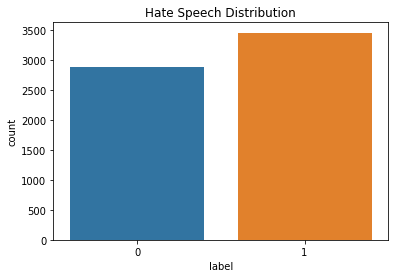

In [9]:
sns.countplot(x='label', data=df).set_title('Hate Speech Distribution')
df.label.value_counts(normalize=True) * 100

In [10]:
df['length'] = df['comment'].apply(len)
df.head()

,id,comment,label,length
0,1,`හුදෙකලා´ එකේ `ද´ ඇහෙනවද කාටහරි,0,31
1,2,18ක පෙනුමක් තියෙන්නේ,0,21
2,3,2020 එනවා කිව්නාට මෙහෙම එයි කියලා හිතුවේ නෑ පට්ට,0,48
3,4,25 කැල්ල..හම්මෝ..,0,17
4,5,25 කෙල්ල අයියලගෙ කාලද කොහෙද ඉන්නෙ,1,33


array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

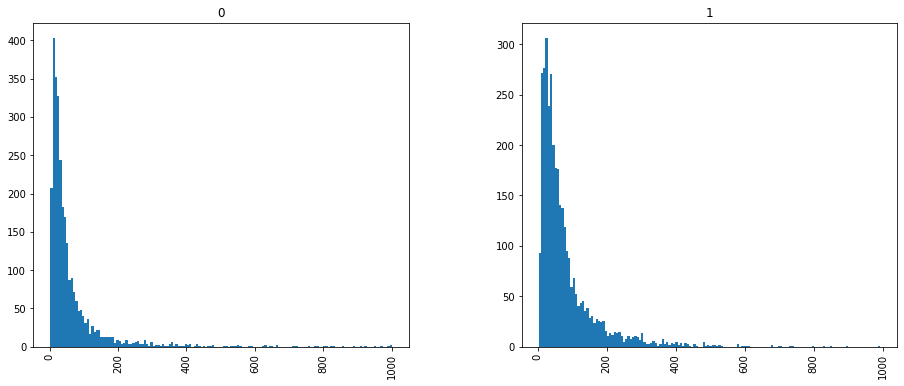

In [11]:
df.hist(column='length',by='label',figsize=(15,6), bins=150)

In [12]:
df[df['label'] == 1]['length'].describe()

count    3455.000000
mean       81.978871
std        93.362112
min         3.000000
25%        28.000000
50%        51.000000
75%        96.000000
max       993.000000
Name: length, dtype: float64

In [13]:
del df['id']

In [14]:
exclude = set(",.:;'\"-?!/´`%")
def removePunctuation(txt):
    return ''.join([(c if c not in exclude else " ") for c in txt])
    
def removeNumbers(txt):
    return ''.join(c for c in txt if not c.isnumeric())

In [15]:
df['cleaned'] = df['comment'].apply(lambda x: removePunctuation(x))
df.head()

,comment,label,length,cleaned
0,`හුදෙකලා´ එකේ `ද´ ඇහෙනවද කාටහරි,0,31,හුදෙකලා එකේ ද ඇහෙනවද කාටහරි
1,18ක පෙනුමක් තියෙන්නේ,0,21,18ක පෙනුමක් තියෙන්නේ
2,2020 එනවා කිව්නාට මෙහෙම එයි කියලා හිතුවේ නෑ පට්ට,0,48,2020 එනවා කිව්නාට මෙහෙම එයි කියලා හිතුවේ නෑ පට්ට
3,25 කැල්ල..හම්මෝ..,0,17,25 කැල්ල හම්මෝ
4,25 කෙල්ල අයියලගෙ කාලද කොහෙද ඉන්නෙ,1,33,25 කෙල්ල අයියලගෙ කාලද කොහෙද ඉන්නෙ
